In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#载入数据
data = np.genfromtxt('LR-testSet2.txt',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

In [8]:
#绘制样本散点图
def plot(data):
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    
    #分类 0  1
    for i in range(len(data)):
        if data[i,2] == 0:
            x0.append(data[i,0])
            y0.append(data[i,1])
        else:
            x1.append(data[i,0])
            y1.append(data[i,1])
    scatter0 = plt.scatter(x0,y0 ,c = 'b' , marker = 'o')
    scatter1 = plt.scatter(x1,y1, c = 'r' , marker = 'x')
    
    #绘制图例
    plt.legend(handles = [scatter0 , scatter1] , labels = ['label0' , 'label1'] , loc = 'best')

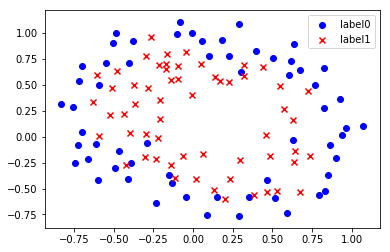

In [9]:
plot(data)
plt.show()

In [24]:
#数据预处理
#非线性逻辑回归，即将线性多项式的一元线性回归方程 变为多项式线性回归方程
#给样本添加degree
x_poly = np.c_[np.ones(len(x_data)) , x_data , x_data[:,0]**2 , x_data[:,0] * x_data[:,1] ,x_data[:,1]**2 ]

#theta设置
theta = np.ones(np.size(x_poly , 1))

array([1., 1., 1., 1., 1., 1.])

In [18]:
#sigmodi函数
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [19]:
#cost函数
def cost_function(x , y , theta):
    h_theta_x = sigmoid(np.dot(x , theta . T))
    I = np.ones(len(y))
    left = np.dot(y.T , np.log(h_theta_x))
    right = np.dot((I - y).T , np.log(I - h_theta_x))
    return -(left + right)

In [20]:
#gradient descent函数
def gradient_descent(x , y , theta , lr , epochs):
    m = len(x) 
    costList = []
    for i in range(epochs):
        h_theta_x = sigmoid(np.dot(x , theta . T))
        theta_gard = np.dot(x.T , h_theta_x - y) / m
        theta = theta - lr * theta_gard
        
        if i % 50 == 0:
            costList.append(cost_function(x , y , theta))
    return theta , costList

In [25]:
ws , costList = gradient_descent(x_poly , y_data , theta , 0.03 , 50000)

In [26]:
ws

array([ 4.29728039,  2.56618437,  3.35373432, -9.98020516, -5.85512928,
       -9.66817518])

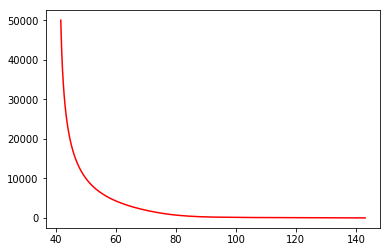

In [27]:
index = np.linspace(0,50000 , len(costList))
plt.plot(costList , index , 'r')
plt.show()